In [2]:
import torch

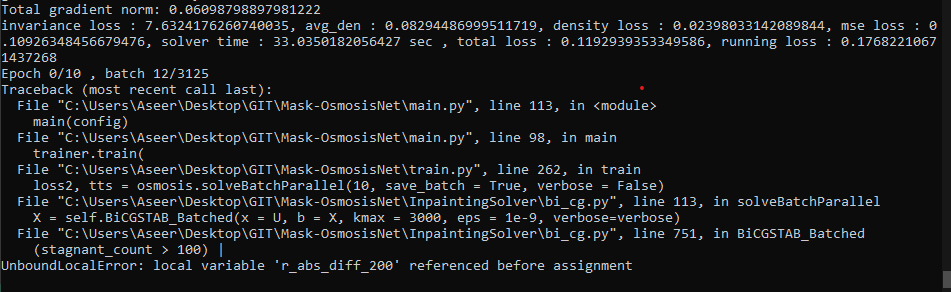

In [23]:
import math
math.log10(8.770187e+04) - math.log10(7.0000e+04) 

0.09791081358009457

In [5]:
1e1

10.0

B, C -> H, W

In [9]:
x = torch.randn((12, 1, 3,4))
B, C, H, W = x.shape

x.view(12*3, 4).shape

torch.Size([36, 4])

stacking images


B, C -> H, W

In [5]:
x = torch.randn((1, 1, 256, 246))
y = torch.randn((1, 1, 256, 246))

z = torch.cat((x, y), dim = 0)
z.shape


torch.Size([2, 1, 256, 246])

Scaling Density

In [13]:
pre_c = torch.special.expit(torch.randn((5, 6, 21, 20))) # non binary
c = torch.float(pre_c + 0.5 ) # binary
torch.sum(c, dim = (2, 3))/(21*20)


TypeError: 'torch.dtype' object is not callable

In [8]:
den = 0.2
c_hat = (den * pre_c) / ( (torch.norm(pre_c, p = 1, dim = (2, 3)).view(5, 6, 1, 1)) / (21*20) + 1e-9)

torch.sum(c_hat, dim = (2, 3))/(21*20)

tensor([[0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000]])

In [9]:
pre_c

tensor([[[[0.4113, 0.2328, 0.2893,  ..., 0.6004, 0.2714, 0.8871],
          [0.7391, 0.3273, 0.7154,  ..., 0.6115, 0.3538, 0.8025],
          [0.1580, 0.3414, 0.5963,  ..., 0.7149, 0.3672, 0.5745],
          ...,
          [0.1156, 0.8795, 0.5768,  ..., 0.5289, 0.4163, 0.5109],
          [0.5176, 0.3451, 0.4834,  ..., 0.7534, 0.3246, 0.4462],
          [0.6345, 0.7848, 0.4857,  ..., 0.6066, 0.3370, 0.6834]],

         [[0.6396, 0.7356, 0.7068,  ..., 0.3587, 0.7428, 0.9070],
          [0.4276, 0.2057, 0.6713,  ..., 0.4889, 0.5835, 0.3201],
          [0.4101, 0.7047, 0.4145,  ..., 0.6020, 0.3147, 0.5535],
          ...,
          [0.3674, 0.3602, 0.2383,  ..., 0.7263, 0.6063, 0.6224],
          [0.7677, 0.7119, 0.5217,  ..., 0.1976, 0.3568, 0.5403],
          [0.6975, 0.4247, 0.2205,  ..., 0.2838, 0.8332, 0.2462]],

         [[0.2645, 0.6593, 0.3639,  ..., 0.3991, 0.1646, 0.9303],
          [0.1149, 0.7731, 0.3526,  ..., 0.5457, 0.5302, 0.6463],
          [0.1459, 0.6410, 0.5822,  ..., 0

In [12]:
c_hat

tensor([[[[0.1671, 0.0945, 0.1175,  ..., 0.2439, 0.1102, 0.3603],
          [0.3002, 0.1330, 0.2906,  ..., 0.2484, 0.1437, 0.3260],
          [0.0642, 0.1387, 0.2422,  ..., 0.2904, 0.1491, 0.2334],
          ...,
          [0.0470, 0.3572, 0.2343,  ..., 0.2149, 0.1691, 0.2075],
          [0.2102, 0.1402, 0.1963,  ..., 0.3060, 0.1318, 0.1813],
          [0.2577, 0.3188, 0.1973,  ..., 0.2464, 0.1369, 0.2776]],

         [[0.2560, 0.2944, 0.2829,  ..., 0.1436, 0.2973, 0.3630],
          [0.1711, 0.0823, 0.2687,  ..., 0.1957, 0.2335, 0.1281],
          [0.1641, 0.2821, 0.1659,  ..., 0.2409, 0.1260, 0.2215],
          ...,
          [0.1470, 0.1442, 0.0954,  ..., 0.2907, 0.2427, 0.2491],
          [0.3073, 0.2849, 0.2088,  ..., 0.0791, 0.1428, 0.2163],
          [0.2792, 0.1700, 0.0882,  ..., 0.1136, 0.3335, 0.0985]],

         [[0.1018, 0.2539, 0.1401,  ..., 0.1537, 0.0634, 0.3582],
          [0.0443, 0.2977, 0.1358,  ..., 0.2101, 0.2042, 0.2489],
          [0.0562, 0.2468, 0.2242,  ..., 0

In [ ]:
c = (c_hat > ).float()
torch.sum(c)/(21*20)

In [ ]:
x = torch.randn((12, 23, 4, 4))
x = torch.special.expit(x) 

d = 12*23

In [ ]:
torch.mean(torch.abs((torch.norm(x, p = 1, dim = (2, 3)) / d) - 0.6))

In [ ]:
torch.floor(x+0.5)

In [ ]:
x = torch.randn((12, 23, 4, 4))
y = torch.randn((12, 23, 4, 4))
d = 12*23

torch.mean(torch.norm(x-y, p = 2, dim = (2,3))**2 / d)